In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("/Users/gilgu/OneDrive/Escritorio")
%matplotlib inline              

In [8]:
df = pd.read_excel('Amazon.xlsx')
df.head()

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43


In [9]:
data = df.iloc[:,1:9]                          #elimina la columna de unname
data

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto
0,205,3,345,235,24,23,26,21
1,9,15,315,33,25,4,42,215
2,17,26,285,3,43,27,41,26
3,135,5,355,295,18,23,39,195
4,3,45,48,39,34,46,225,34
...,...,...,...,...,...,...,...,...
95,3,8,32,25,7,21,42,17
96,305,25,46,24,33,28,355,26
97,1,14,26,25,24,27,42,185
98,155,11,335,34,26,29,42,215


In [11]:
from sklearn.preprocessing import normalize          #Normalizar las columnas:

In [12]:
#Se crea un Dataframe con los datos normalizados:

data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled.head()

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto
0,0.438553,0.006418,0.738053,0.502732,0.051343,0.049204,0.055621,0.044925
1,0.023296,0.038827,0.815367,0.085419,0.064712,0.010354,0.108716,0.556521
2,0.057591,0.088080,0.965497,0.010163,0.145672,0.091468,0.138896,0.088080
3,0.258994,0.009592,0.681058,0.565950,0.034533,0.044125,0.074820,0.374102
4,0.012155,0.182331,0.194487,0.158020,0.137761,0.186383,0.911656,0.137761


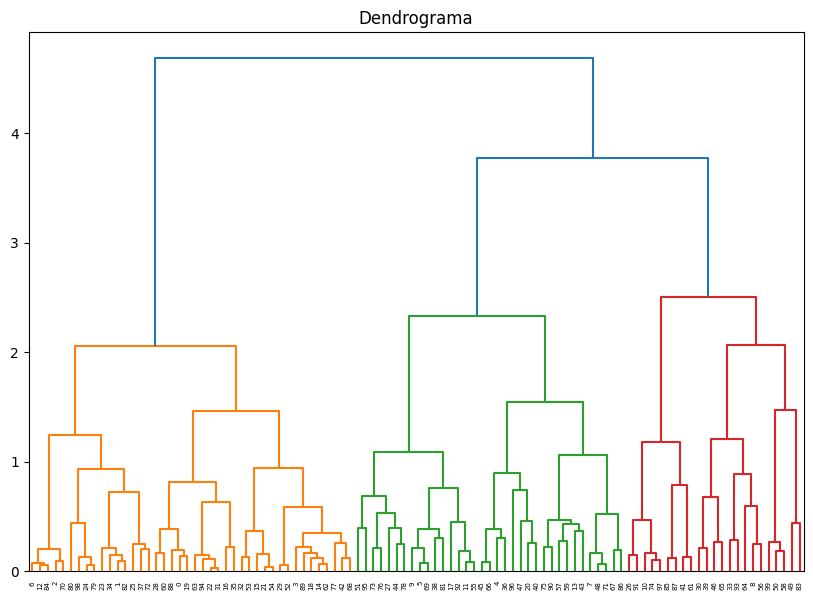

In [32]:
#Creación del Dendograma.

import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10,7))
plt.title("Dendrograma")
dend = shc.dendrogram(shc.linkage(data_scaled,method ='ward'))

In [14]:
#>imprime la lista de colores asociados a cada uno de los puntos(observaciones) en el dendrograma.

print(dend['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C0', 'C0']


In [15]:
colores_unicos = set(dend['color_list'])
colores_unicos

{'C0', 'C1', 'C2', 'C3'}

In [16]:
num_clusters_optimo =len(colores_unicos)-1
num_clusters_optimo

3

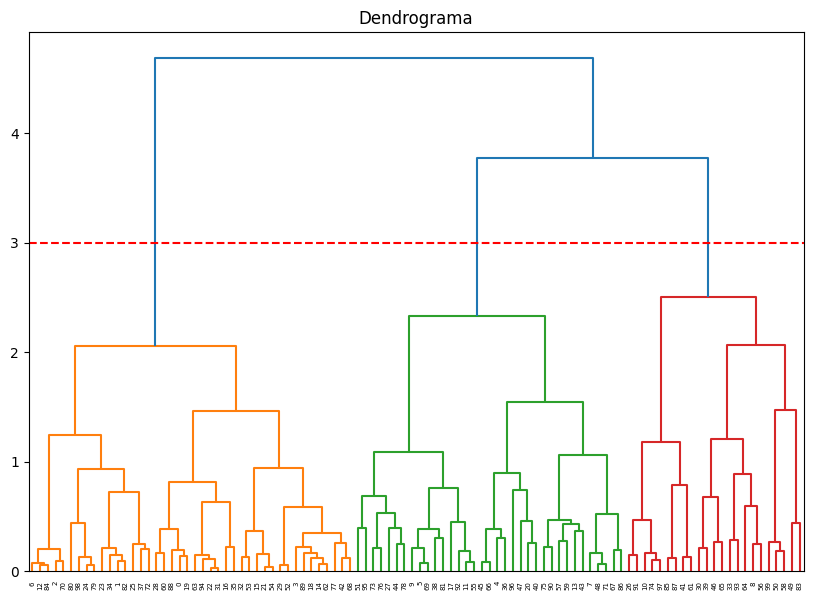

In [33]:
#Código para realizar el corte

plt.figure(figsize = (10,7))
plt.title("Dendrograma")
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))
plt.axhline(y = 3,color='r',linestyle = '--')

In [18]:
#Agrupación de los datos

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
grupos = cluster.fit_predict(data_scaled)
grupos

C:\Users\gilgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0], dtype=int64)

In [20]:
campos = data_scaled.values
campos

array([[0.43855309, 0.00641785, 0.73805277, 0.50273159, 0.0513428 ,
        0.04920352, 0.05562137, 0.04492495],
       [0.02329621, 0.03882702, 0.81536748, 0.08541945, 0.0647117 ,
        0.01035387, 0.10871566, 0.55652066],
       [0.05759106, 0.08808045, 0.96549723, 0.01016313, 0.14567151,
        0.09146816, 0.13889609, 0.08808045],
       [0.25899403, 0.00959237, 0.68105837, 0.56594991, 0.03453254,
        0.04412491, 0.0748205 , 0.37410248],
       [0.01215542, 0.18233124, 0.19448666, 0.15802041, 0.13776138,
        0.18638304, 0.9116562 , 0.13776138],
       [0.14494158, 0.25174064, 0.60265182, 0.03661682, 0.03966822,
        0.02898832, 0.7399649 , 0.03356542],
       [0.04765655, 0.02486429, 0.98421132, 0.06837679, 0.07252083,
        0.09324107, 0.07873691, 0.06008869],
       [0.13346994, 0.04312106, 0.0636549 , 0.52361286, 0.05749475,
        0.04517444, 0.7084174 , 0.44147751],
       [0.74424967, 0.0216509 , 0.12719903, 0.63599517, 0.09472268,
        0.00811909, 0.102841

In [21]:
#Análisis de componentes principales a dos componentes.

from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(campos)
campos = pca.transform(campos)
campos

array([[-3.99666825e-01,  6.11206227e-02],
       [-4.10008865e-01, -6.58098409e-02],
       [-5.01993647e-01, -3.64530474e-01],
       [-3.39369094e-01,  1.84958218e-01],
       [ 5.86947857e-01, -3.96311037e-01],
       [ 1.75113880e-01, -5.27570862e-01],
       [-5.66672422e-01, -3.39781905e-01],
       [ 5.34839333e-01,  7.15052389e-02],
       [ 9.67799633e-02,  4.75133793e-01],
       [ 2.23299641e-01, -5.66027685e-01],
       [ 8.13000108e-02,  3.97181039e-01],
       [-5.81348595e-04, -4.89183861e-01],
       [-5.73991581e-01, -3.61116636e-01],
       [ 5.14914191e-01,  1.54795491e-02],
       [-3.53248795e-01,  2.06661675e-01],
       [-4.69646913e-01,  1.59151862e-02],
       [-2.50861256e-01,  4.62723758e-02],
       [-5.35729193e-02, -2.21969633e-01],
       [-3.61982076e-01,  2.05708953e-01],
       [-4.09224978e-01,  2.31701761e-02],
       [ 5.42934142e-01, -3.19267831e-02],
       [-5.12214588e-01, -8.98539719e-02],
       [-4.26659423e-01, -5.92781311e-02],
       [-4.

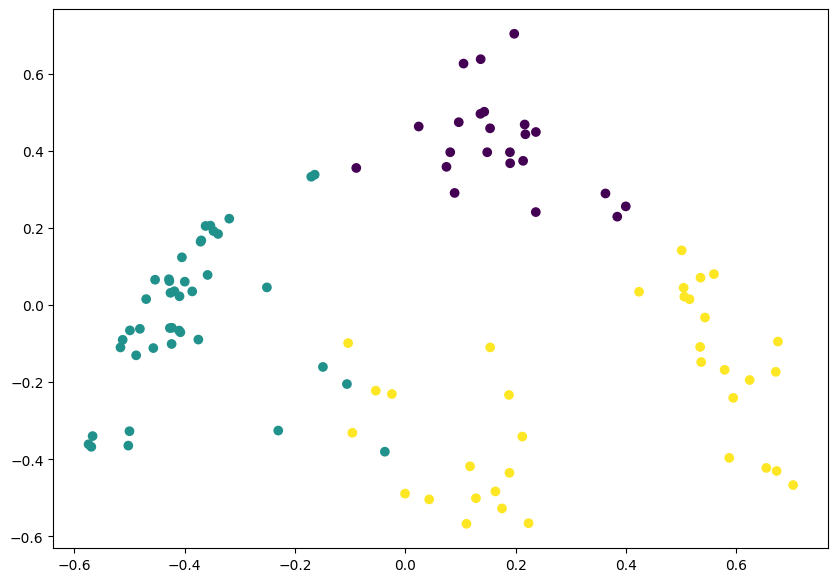

In [23]:
#Se crea el gráfico de dispersión

plt.figure(figsize=(10,7))
plt.scatter(campos[:,0], campos[:,1], c = cluster.labels_)

In [30]:
#Se crea un objeto dataframe a partir de la variable grupos.

dataframe = pd.DataFrame(grupos, columns=['grupo'])
dataframe

,grupo
0,1
1,1
2,1
3,1
4,2
5,2
6,1
7,2
8,0
9,2


In [29]:
#Se realiza la unión de los dos dataframes, agregándose "grupo" a las columnas.

pd.options.display.max_rows = None
dataframe2 = pd.concat([df, dataframe], axis=1, join='inner')
dataframe2

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,"(grupo,)"
0,Adam,205,3,345,235,24,23,26,21,17,1
1,Anna,9,15,315,33,25,4,42,215,28,1
2,Bernard,17,26,285,3,43,27,41,26,33,1
3,Edward,135,5,355,295,18,23,39,195,17,1
4,Emilia,3,45,48,39,34,46,225,34,43,2
5,Fabian,95,165,395,24,26,19,485,22,3,2
6,Philip,23,12,475,33,35,45,38,29,31,1
7,Frank,65,21,31,255,28,22,345,215,29,2
8,Xavier,275,8,47,235,35,3,38,27,48,0
9,Gabriel,2,175,325,3,37,32,435,27,39,2


In [ ]:
Salomé.- Se encuentra en el grupo 2 mismo que Melania, Maya y Leo.
Stephania.-  Se encuentra en el grupo 1 mismo que Lydia Adam y Philip.
Lydia.-  Se encuentra en el grupo 1 mismo que Stephania, Teon y Theodore.